In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel("studentTandF18.xlsx", sheet_name = "NewSheet", dtype={'zips': str, 'distance': object, 
                                                                          'totalDistance':object})

In [3]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True) 

In [4]:
df.columns = ['zips', 'distance', 'totalDistance']

In [5]:
df.head(3)

,zips,distance,totalDistance
0,00824,1629,1629
1,00902,1573,1573
2,00913,1552,1552


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 3 columns):
zips             738 non-null object
distance         738 non-null object
totalDistance    738 non-null object
dtypes: object(3)
memory usage: 17.4+ KB


In [7]:
print(df[df['distance'] == 'Singapore'])
print(df[df['distance'] == 'Germany'])
print(df[df['distance'] == 'Honolulu'])
print(df[df['distance'] == 'Kauai'])

      zips   distance totalDistance
115  08012  Singapore     Singapore
      zips distance totalDistance
121  08058  Germany       Germany
      zips  distance totalDistance
727  96706  Honolulu      Honolulu
      zips distance totalDistance
728  96756    Kauai         Kauai


In [8]:
df.drop([115, 121, 727, 728], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 737
Data columns (total 3 columns):
zips             734 non-null object
distance         734 non-null object
totalDistance    734 non-null object
dtypes: object(3)
memory usage: 22.9+ KB


In [9]:
df['car'] = df[df['distance'] <= 300]['distance']
df['airTravel'] = df[df['distance'] > 300]['distance']

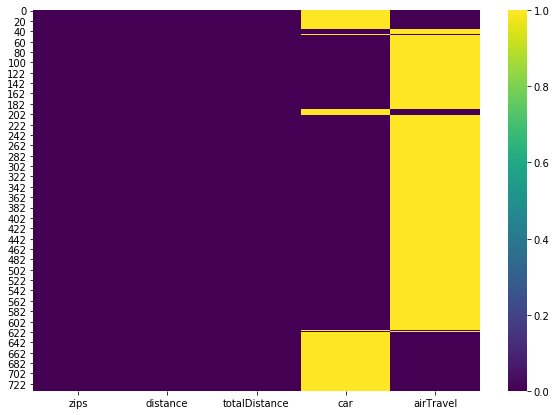

In [10]:
plt.figure(figsize=(10,7))  
sns.heatmap(df.isnull(), cmap = 'viridis')

In [11]:
df_copy = df.copy() 

In [12]:
df_copy.drop(['airTravel'], axis = 1, inplace = True) 

In [13]:
df_copy.head(3)

,zips,distance,totalDistance,car
0,00824,1629,1629,NaN
1,00902,1573,1573,NaN
2,00913,1552,1552,NaN


In [14]:
df_copy.dropna(inplace=True)

In [15]:
df_copy['totalDistance'] = 4*df['totalDistance']

In [16]:
print("Total miles covered by students who commute through car =", df_copy['totalDistance'].sum())

Total miles covered by students who commute through car = 436758.40000000014


In [17]:
print("Average passenger/miles of students who commute through car =", ((436758/4)/(1366-165))) 

Average passenger/miles of students who commute through car = 90.91548709408826


In [18]:
df_copy2 = df.copy()

In [19]:
df_copy2.drop(['car'], axis = 1, inplace = True) 

In [20]:
df_copy2.dropna(inplace = True)

In [21]:
df_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 737
Data columns (total 4 columns):
zips             165 non-null object
distance         165 non-null object
totalDistance    165 non-null object
airTravel        165 non-null object
dtypes: object(4)
memory usage: 6.4+ KB


In [22]:
df_copy2['totalDistance'] = 4*df_copy2['totalDistance']

In [23]:
df_copy2.head(3)

,zips,distance,totalDistance,airTravel
0,00824,1629,6516,1629
1,00902,1573,6292,1573
2,00913,1552,6208,1552


In [24]:
print("Total miles covered by students who commute through air travel =", df_copy2['totalDistance'].sum()) 

Total miles covered by students who commute through air travel = 934988


In [25]:
print("Total distance of students who commute through air travel per trip =", 934988/4)

Total distance of students who commute through air travel per trip = 233747.0


In [26]:
print("Passenger/miles of students who use air travel", 233747/165)

Passenger/miles of students who use air travel 1416.648484848485
